In [1]:
# import os
# from IPython.display import Image, SVG , display
# display(Image(os.getcwd() +'\\pic.jpg', width=2000))

# Importing and understanding the data

## Importing Libraries

### Data Manipulation

In [2]:
import pandas as pd
import numpy as np
import random

### Data Visualization

<div>Seaborn is built over Matplotlib and makes building more attractive plots easier. Just by importing Seaborn, your matplotlib plots are made ‘prettier’ without any code modification.
</div>

In [3]:
# plotting graphs
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### DateTime Handling

In [4]:
from datetime import datetime

### Importing OS

In [5]:
import os

### Importing Imputer Library

In [6]:
from sklearn.impute import SimpleImputer

## Importing Data

In [7]:
from sklearn.datasets import load_iris, load_diabetes, load_wine,load_breast_cancer,load_boston

###### Example: For excel formats, use pd.read_xlsx Function
###### Write for different Importing data formats

In [8]:
# Define Path 
path = os.getcwd()


In [9]:
# dataset=load_wine()
# data = pd.DataFrame(dataset['data'],
#                     columns = dataset.feature_names)
# data['target'] = dataset.target

data = pd.read_csv('airq402.csv',header=None)
headers = pd.read_csv('airq402dim.csv', header=None)
data.columns = headers.iloc[:,0]

In [10]:
data

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
...,...,...,...,...,...,...,...,...,...,...,...
995,SYR,TPA,136.16,1104,184.34,US,33.37,135.82,DL,28.65,118.51
996,TLH,TPA,83.28,200,232.71,FL,99.57,82.55,FL,99.57,82.55
997,TPA,IAD,159.97,814,843.80,US,46.19,159.65,DL,13.89,159.02
998,TPA,PBI,73.57,174,214.45,WN,99.74,73.44,WN,99.74,73.44


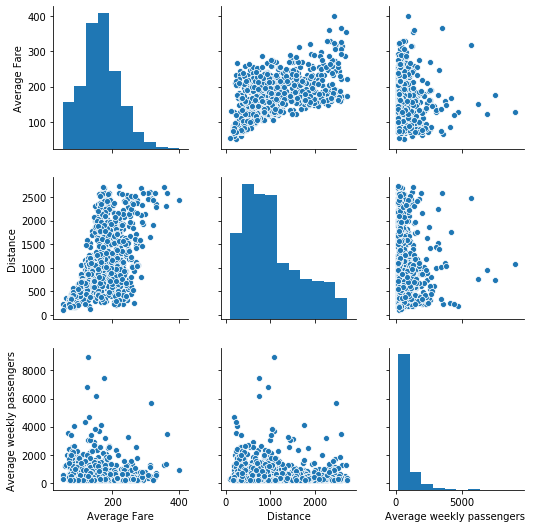

In [11]:
sns.pairplot(data.iloc[:,2:5])

## Data Exploration and Checks

### Checking for Features Data Types

<div class="alert alert-block alert-info">

A data type object (an instance of numpy.dtype class) describes how the bytes in the fixed-size block of memory corresponding to an array item should be interpreted. It describes the following aspects of the data:
<P>
<br><b>1.Type of the data</b> (integer, float, Python object, etc.)
<br><b>2. Size of the data</b> (how many bytes is in e.g. the integer)
</div>

In [12]:
print(data.dtypes)

0
City1                          object
City2                          object
Average Fare                  float64
Distance                        int64
Average weekly passengers     float64
market leading airline         object
market share                  float64
Average fare                  float64
Low price airline              object
market share                  float64
price                         float64
dtype: object


In [13]:
data.select_dtypes(['object'])

,City1,City2,market leading airline,Low price airline
0,CAK,ATL,FL,FL
1,CAK,MCO,FL,DL
2,ALB,ATL,DL,CO
3,ALB,BWI,WN,WN
4,ALB,ORD,UA,WN
...,...,...,...,...
995,SYR,TPA,US,DL
996,TLH,TPA,FL,FL
997,TPA,IAD,US,DL
998,TPA,PBI,WN,WN


### Checking the Shape of the Training Data

<div class="alert alert-block alert-info">
<b>Shape attribute returns the dimensions of the dataset. If Y has n rows and m columns, then Y.shape is (n,m)</b>
</div>

In [14]:
data.shape

(1000, 11)

### Checking for Null Values

<div class="alert alert-block alert-info">
<b>isnull() function detect missing values in the given series object.
It returns a boolean which is aggregated here at column level to determine number of nulls against every column</b>
 </div>

In [15]:
total = data.isnull().sum().sort_values(ascending = False) 

In [16]:
print(total)

0
price                         0
market share                  0
Low price airline             0
Average fare                  0
market share                  0
market leading airline        0
Average weekly passengers     0
Distance                      0
Average Fare                  0
City2                         0
City1                         0
dtype: int64


### Cleaning Column Names

<div class="alert alert-block alert-info">
<b>Special characters and spaces in column name doesn't work across all technologies, hence removing them for easier and error-free processing</b><br>
<b> Strip removes spaces and replace substitutes specific string </b>
</div>

In [17]:
data.columns = [x.lower().strip().replace(" ",'_') for x in data.columns]
data.columns

Index(['city1', 'city2', 'average_fare', 'distance',
       'average_weekly_passengers', 'market_leading_airline', 'market_share',
       'average_fare', 'low_price_airline', 'market_share', 'price'],
      dtype='object')

In [19]:
data['city1'].dtype

dtype('O')

### Identifying Categorical & Numerical Data Types

In [34]:
# cat_vars= list()
# num_vars = list()

# for col in data.columns:
#     if data[col].dtype =='object':
#         cat_vars.append(col)
#     elif data[col].dtype in ['float64','int64']:
#         num_vars.append(col)

In [35]:
num_vars=['average_fare', 'distance',
       'average_weekly_passengers', 'market_share',
       'average_fare', 'market_share', 'price']

In [36]:
cat_vars=['market_leading_airline','low_price_airline','city1','city2']

### Drop Irrelevant columns

<div class="alert alert-block alert-info">
<b>DataFrame.drop(self, labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')</b>
</div>

In [37]:
# data.drop([''], axis = 1, inplace = True)

# Understanding/Visualizing Data

## Summary by Variable Types

### Using Describe Function

<div class="alert alert-block alert-info">
<b>percentiles :</b> list-like of numbers, optional
The percentiles to include in the output. All should fall between 0 and 1. The default is [.25, .5, .75], which returns the 25th, 50th, and 75th percentiles.

<b>include :</b> ‘all’, list-like of dtypes or None (default), optional
A white list of data types to include in the result. Ignored for Series. Here are the options:

<b>‘all’ :</b> All columns of the input will be included in the output.

<b>A list-like of dtypes :</b> Limits the results to the provided data types. 
To limit the result to numeric types submit numpy.number. To limit it instead to object columns submit the numpy.object data type. Strings can also be used in the style of select_dtypes (e.g. df.describe(include=['O'])). To select pandas categorical columns, use 'category'

<b>None (default) :</b> The result will include all numeric columns.
exclude : list-like of dtypes or None (default), optional,
A black list of data types to omit from the result. Ignored for Series. Here are the options:

<b>A list-like of dtypes :</b> Excludes the provided data types from the result. To exclude numeric types submit numpy.number. To exclude object columns submit the data type numpy.object. Strings can also be used in the style of select_dtypes (e.g. df.describe(include=['O'])). To exclude pandas categorical columns, use 'category'

<b>None (default) :</b> The result will exclude nothing.
</div>

In [22]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
city1,1000,90,ATL,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city2,1000,85,TPA,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
average_fare,1000,NaN,NaN,NaN,163.375,55.3655,50.52,125.975,161.345,197.392,401.23
distance,1000,NaN,NaN,NaN,1056.97,643.203,108,553.5,919,1452.5,2724
average_weekly_passengers,1000,NaN,NaN,NaN,672.279,766.519,181.41,257.197,404.78,769.912,8950.76
market_leading_airline,1000,16,WN,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
market_share,1000,NaN,NaN,NaN,60.1286,19.3678,17.68,46.51,59.24,73.51,100
average_fare,1000,NaN,NaN,NaN,166.648,62.6601,50.52,124.085,161.4,202.977,490.03
low_price_airline,1000,19,WN,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
market_share,1000,NaN,NaN,NaN,34.5515,27.097,1.06,13.195,26.14,52.9725,100


### Cross Tabulated Summary

In [23]:
pd.crosstab(data["city1"], data["market_leading_airline"],margins=True)

market_leading_airline,AA,AS,B6,CO,DL,F9,FL,G4,HP,NK,NW,TZ,UA,US,WN,YX,All
city1,,,,,,,,,,,,,,,,,
ABQ,3,0,0,0,1,0,0,0,0,0,1,0,1,0,12,0,18
ACY,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,4
ALB,0,0,0,0,2,0,0,0,0,0,0,0,1,1,4,0,8
AMA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2
ATL,0,0,0,0,60,0,4,0,0,0,0,0,0,0,0,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SYR,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
TLH,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
TPA,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2


### Data Filter

In [24]:
data[data.market_leading_airline.isin(['AA', 'AS'])].head(3)
data[~data.market_leading_airline.isin(['AA', 'AS'])].head(3)

,city1,city2,average_fare,distance,average_weekly_passengers,market_leading_airline,market_share,average_fare,low_price_airline,market_share,price
12,ABQ,ORD,170.67,1121,364.78,AA,45.94,174.62,WN,33.87,163.22
19,ABQ,LGA,233.05,1825,344.45,AA,31.33,233.26,DL,19.50,222.08
27,ABQ,IAD,227.93,1650,301.84,AA,46.59,213.13,AA,46.59,213.13


,city1,city2,average_fare,distance,average_weekly_passengers,market_leading_airline,market_share,average_fare,low_price_airline,market_share,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12


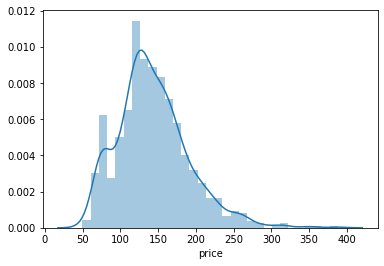

In [26]:
sns.distplot(data.price)

### Conditional Filtering

In [27]:
data['PriceFlag'] = np.where((data['price']<150),1, 0)
# data['PriceFlag'] = np.where((data['price']<150)& (...),'High_Prosp', 'Mid_Prosp')
data['PriceFlag'].value_counts()

1    603
0    397
Name: PriceFlag, dtype: int64

### Using Pivot Table Function

<div class="alert alert-block alert-info"> 

<b>data :</b> DataFrame

<b>values :</b> column to aggregate, optional

<b>index :</b> column, Grouper, array, or list of the previous
If an array is passed, it must be the same length as the data. The list can contain any of the other types (except list). Keys to group by on the pivot table index. If an array is passed, it is being used as the same manner as column values.

<b>columns :</b> column, Grouper, array, or list of the previous
If an array is passed, it must be the same length as the data. The list can contain any of the other types (except list). Keys to group by on the pivot table column. If an array is passed, it is being used as the same manner as column values.

<b>aggfunc :</b> function, list of functions, dict, default numpy.mean
If list of functions passed, the resulting pivot table will have hierarchical columns whose top level are the function names (inferred from the function objects themselves) If dict is passed, the key is column to aggregate and value is function or list of functions

<b>fill_value :</b> scalar, default None
Value to replace missing values with

<b>margins :</b> boolean, default False
Add all row / columns (e.g. for subtotal / grand totals)

<b>dropna :</b> boolean, default True
Do not include columns whose entries are all NaN

<b>margins_name :</b> string, default ‘All’
Name of the row / column that will contain the totals when margins is True.

<b>observed :</b> boolean, default False
This only applies if any of the groupers are Categoricals. If True: only show observed values for categorical groupers. If False: show all values for categorical groupers.
</div>

In [39]:
data.pivot_table(values='price', 
                 index=['city1'], 
                 columns=['market_leading_airline'], 
                 margins_name="Total", 
                 aggfunc=['count'], 
                 margins= True)

count                                                 \
market_leading_airline     AA    AS    B6    CO     DL   F9    FL   G4    HP   
city1                                                                          
ABQ                       3.0   NaN   NaN   NaN    1.0  NaN   NaN  NaN   NaN   
ACY                       NaN   NaN   NaN   NaN    NaN  NaN   NaN  NaN   NaN   
ALB                       NaN   NaN   NaN   NaN    2.0  NaN   NaN  NaN   NaN   
AMA                       NaN   NaN   NaN   NaN    NaN  NaN   NaN  NaN   NaN   
ATL                       NaN   NaN   NaN   NaN   60.0  NaN   4.0  NaN   NaN   
...                       ...   ...   ...   ...    ...  ...   ...  ...   ...   
SYR                       NaN   NaN   NaN   NaN    NaN  NaN   NaN  NaN   NaN   
TLH                       NaN   NaN   NaN   NaN    NaN  NaN   1.0  NaN   NaN   
TPA                       NaN   NaN   NaN   NaN    NaN  NaN   NaN  NaN   NaN   
TYS                       NaN   NaN   NaN   NaN    1.0  NaN   NaN  NaN   NaN   
Total                   135.0  32.0  14.0  69.0  162.0  3.0  16.0  1.0  30.0   

                                                                         
market_leading_airline    NK    NW    TZ    UA    US     WN    YX Total  
city1                                                                    
ABQ                      NaN   1.0   NaN   1.0   NaN   12.0   NaN    18  
ACY                      4.0   NaN   NaN   NaN   NaN    NaN   NaN     4  
ALB                      NaN   NaN   NaN   1.0   1.0    4.0   NaN     8  
AMA                      NaN   NaN   NaN   NaN   NaN    2.0   NaN     2  
ATL                      NaN   NaN   NaN   NaN   NaN    NaN   NaN    64  
...                      ...   ...   ...   ...   ...    ...   ...   ...  
SYR                      NaN   NaN   NaN   NaN   1.0    NaN   NaN     1  
TLH                      NaN   NaN   NaN   NaN   NaN    NaN   NaN     1  
TPA                      NaN   NaN   NaN   NaN   1.0    1.0   NaN     2  
TYS                      NaN   NaN   NaN   NaN   NaN    NaN   NaN     1  
Total                   10.0  86.0  10.0  91.0  68.0  257.0  16.0  1000  

[91 rows x 17 columns]

### Using Group By Function

<div class="alert alert-block alert-info">
<b>Syntax:</b> DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, **kwargs)

<b>Parameters :</b>

<b>by :</b> mapping, function, str, or iterable

<b>axis :</b> int, default 0

<b>level :</b> If the axis is a MultiIndex (hierarchical), group by a particular level or levels

<b>as_index :</b> For aggregated output, return object with group labels as the index. Only relevant for DataFrame input. as_index=False is effectively “SQL-style” grouped output

<b>sort :</b> Sort group keys. Get better performance by turning this off. Note this does not influence the order of 
observations within each group. groupby preserves the order of rows within each group.

<b>group_keys :</b> When calling apply, add group keys to index to identify pieces

<b>squeeze :</b> Reduce the dimensionality of the return type if possible, otherwise return a consistent type

<b>Returns :</b> GroupBy object

</div>

In [28]:
data_group = data.groupby(by = ['city1','city2'])
data_group.first()

average_fare  distance  average_weekly_passengers  \
city1 city2                                                      
ABQ   ATL          212.49      1269                     198.80   
      BWI          173.56      1670                     312.39   
      DEN          168.69       349                     308.26   
      DFW          120.24       580                     839.78   
      IAD          227.93      1650                     301.84   
...                   ...       ...                        ...   
SYR   TPA          136.16      1104                     184.34   
TLH   TPA           83.28       200                     232.71   
TPA   IAD          159.97       814                     843.80   
      PBI           73.57       174                     214.45   
TYS   LGA          199.60       647                     196.41   

            market_leading_airline  market_share  average_fare  \
city1 city2                                                      
ABQ   ATL                       DL         68.39        226.79   
      BWI                       WN         49.16        180.49   
      DEN                       UA         59.55        181.34   
      DFW                       WN         71.91        117.20   
      IAD                       AA         46.59        213.13   
...                            ...           ...           ...   
SYR   TPA                       US         33.37        135.82   
TLH   TPA                       FL         99.57         82.55   
TPA   IAD                       US         46.19        159.65   
      PBI                       WN         99.74         73.44   
TYS   LGA                       DL         37.24        185.98   

            low_price_airline  market_share   price  PriceFlag  
city1 city2                                                     
ABQ   ATL                  AA         11.91  200.93          0  
      BWI                  AA         14.37  161.39          0  
      DEN                  F9         39.95  149.41          1  
      DFW                  WN         71.91  117.20          1  
      IAD                  AA         46.59  213.13          0  
...                       ...           ...     ...        ...  
SYR   TPA                  DL         28.65  118.51          1  
TLH   TPA                  FL         99.57   82.55          1  
TPA   IAD                  DL         13.89  159.02          0  
      PBI                  WN         99.74   73.44          1  
TYS   LGA                  US         16.87  173.40          0  

[1000 rows x 10 columns]

In [30]:
data.groupby(['city1','market_leading_airline']).agg({'average_fare':'mean','price':'max'})

average_fare               \
                             average_fare     distance   
city1 market_leading_airline                             
ABQ   AA                       210.550000  1532.000000   
      DL                       212.490000  1269.000000   
      NW                       181.990000   981.000000   
      UA                       168.690000   349.000000   
      WN                       135.984167   849.166667   
...                                   ...          ...   
SYR   US                       136.160000  1104.000000   
TLH   FL                        83.280000   200.000000   
TPA   US                       159.970000   814.000000   
      WN                        73.570000   174.000000   
TYS   DL                       199.600000   647.000000   

                                                                     \
                             average_weekly_passengers market_share   
city1 market_leading_airline                                          
ABQ   AA                                    337.023333    41.286667   
      DL                                    198.800000    68.390000   
      NW                                    187.280000    65.000000   
      UA                                    308.260000    59.550000   
      WN                                    473.075833    72.314167   
...                                                ...          ...   
SYR   US                                    184.340000    33.370000   
TLH   FL                                    232.710000    99.570000   
TPA   US                                    843.800000    46.190000   
      WN                                    214.450000    99.740000   
TYS   DL                                    196.410000    37.240000   

                                                                              \
                             average_fare market_share       price PriceFlag   
city1 market_leading_airline                                                   
ABQ   AA                       207.003333    33.320000  199.476667  0.000000   
      DL                       226.790000    11.910000  200.930000  0.000000   
      NW                       182.270000     2.370000  109.140000  1.000000   
      UA                       181.340000    39.950000  149.410000  1.000000   
      WN                       135.293333    51.870833  129.181667  0.583333   
...                                   ...          ...         ...       ...   
SYR   US                       135.820000    28.650000  118.510000  1.000000   
TLH   FL                        82.550000    99.570000   82.550000  1.000000   
TPA   US                       159.650000    13.890000  159.020000  0.000000   
      WN                        73.440000    99.740000   73.440000  1.000000   
TYS   DL                       185.980000    16.870000  173.400000  0.000000   

                                 price                                  \
                             PriceFlag average_weekly_passengers city2   
city1 market_leading_airline                                             
ABQ   AA                             0                    364.78   ORD   
      DL                             0                    198.80   ATL   
      NW                             1                    187.28   MSP   
      UA                             1                    308.26   DEN   
      WN                             1                   1252.39   TUS   
...                                ...                       ...   ...   
SYR   US                             1                    184.34   TPA   
TLH   FL                             1                    232.71   TPA   
TPA   US                             0                    843.80   IAD   
      WN                             1                    214.45   PBI   
TYS   DL                             0                    196.41   LGA   

                                                               

## Univariate Analysis

<div><b>Few Examples</b></div>

<div class="alert alert-block alert-info"> 
<b>Show the counts of observations in each categorical bin using bars.

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot(), so you can compare counts across nested variables.</b>
</div>

<Figure size 864x576 with 0 Axes>

Text(0, 0.5, 'Count')

Text(0.5, 0, 'market_leading_airline')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

Text(0.5, 1.0, 'Frequency')

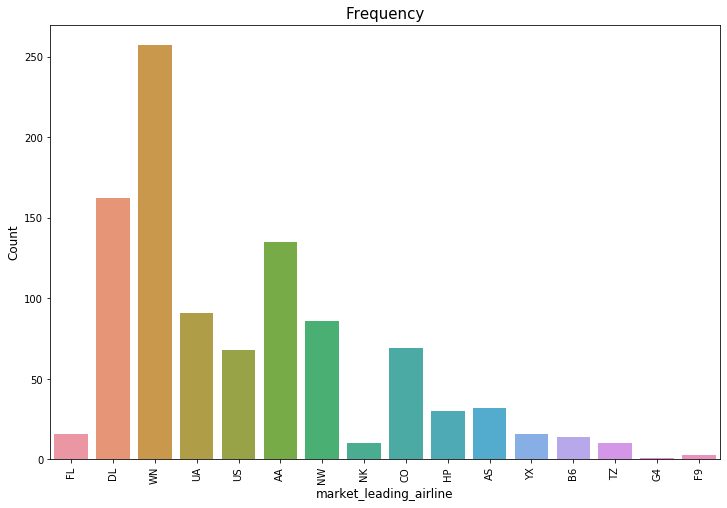

In [47]:
plt.figure(figsize=(12,8))
sns.countplot(x="market_leading_airline", data=data)
plt.ylabel('Count', fontsize=12)
plt.xlabel('market_leading_airline', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency", fontsize=15)
plt.show()

<div class="alert alert-block alert-info"> 
<b>Flexibly plot a univariate distribution of observations.

This function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn kdeplot() and rugplot() functions. It can also fit scipy.stats distributions and plot the estimated PDF over the data.</b>
</div>

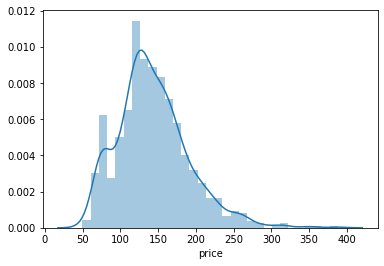

In [33]:
sns.distplot(data['price'])

## Bivariate Analysis

### Correlation Between Variables

<div class="alert alert-block alert-info"> 
<b>Syntax:</b> DataFrame.count(axis=0, level=None, numeric_only=False)

<b>Parameters:</b>

<b>method :</b>
    <b>pearson :</b> standard correlation coefficient
    <b>kendall :</b> Kendall Tau correlation coefficient
    <b>spearman :</b> Spearman rank correlation
    <b>min_periods :</b> Minimum number of observations required per pair of columns to have a valid result. Currently only available for pearson and spearman correlation

<b>Returns:</b> count :y : DataFrame
</div>

In [40]:
corrMatrix = data.corr(method='pearson')
corrMatrix

,average_fare,distance,average_weekly_passengers,market_share,average_fare,market_share,price,PriceFlag
average_fare,1.000000,0.587169,-0.126175,-0.234142,0.981462,-0.458660,0.866410,-0.659914
distance,0.587169,1.000000,-0.090131,-0.531406,0.564082,-0.367831,0.583239,-0.469748
average_weekly_passengers,-0.126175,-0.090131,1.000000,-0.067605,-0.100946,0.034241,-0.142314,0.168490
market_share,-0.234142,-0.531406,-0.067605,1.000000,-0.220801,0.306832,-0.307672,0.229197
average_fare,0.981462,0.564082,-0.100946,-0.220801,1.000000,-0.472838,0.826511,-0.613901
market_share,-0.458660,-0.367831,0.034241,0.306832,-0.472838,1.000000,-0.240186,0.141320
price,0.866410,0.583239,-0.142314,-0.307672,0.826511,-0.240186,1.000000,-0.777317
PriceFlag,-0.659914,-0.469748,0.168490,0.229197,-0.613901,0.141320,-0.777317,1.000000


In [43]:
data[cat_vars].apply(lambda x : pd.factorize(x)[0]).corr(method='spearman', min_periods=1)

,market_leading_airline,low_price_airline,city1,city2
market_leading_airline,1.000000,0.333194,0.180025,-0.064712
low_price_airline,0.333194,1.000000,0.069102,0.000326
city1,0.180025,0.069102,1.000000,0.198481
city2,-0.064712,0.000326,0.198481,1.000000


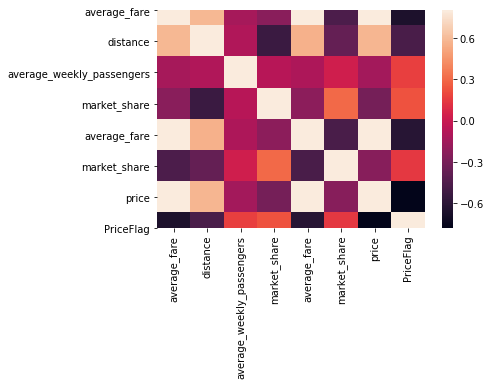

In [46]:
sns.heatmap(data.corr(), vmax=0.8)

### Few Examples

<div class="alert alert-block alert-info"> 
<b>Draw a box plot to show distributions with respect to categories.

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range</b>
</div>

<Figure size 864x576 with 0 Axes>

Text(0, 0.5, '')

Text(0.5, 0, '')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

Text(0.5, 1.0, 'How price changes wrt city')

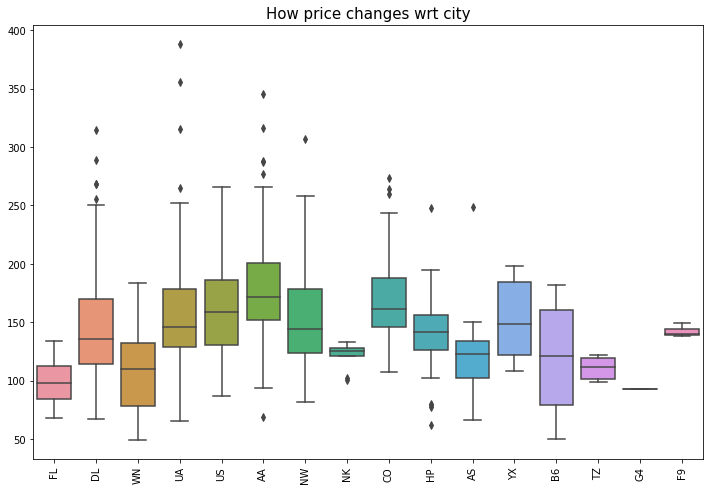

In [49]:
plt.figure(figsize=(12,8))
sns.boxplot(x='market_leading_airline', y = "price", data=data)
plt.ylabel('', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("How price changes wrt city", fontsize=15)
plt.show()

<div class="alert alert-block alert-info"> 
<b>A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars. Bar plots include 0 in the quantitative axis range, and they are a good choice when 0 is a meaningful value for the quantitative variable, and you want to make comparisons against it.</b>
</div>

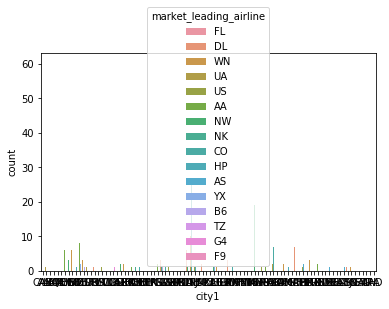

In [53]:
sns.countplot(x="city1", hue="market_leading_airline", data=data)

## Multivariate Analysis

<div class="alert alert-block alert-info"> 
<b>Draw a scatterplot where one variable is categorical.

A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.</b>
</div>

<div class="alert alert-block alert-info"> 
<b>Draw a box plot to show distributions with respect to categories.

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range</b>
</div>

In [ ]:
plt.figure(figsize=(20,15))
sns.boxplot(x="", y="", hue = "", data=data)

# Outlier Identification and Removal

## Categorical Variables

In [ ]:
for col in cat_vars:
    print(col)
    data[col].value_counts()

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="", data=data)
plt.ylabel('Count', fontsize=12)
plt.xlabel('X', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency", fontsize=15)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="", hue="", data=data)
plt.ylabel('Count', fontsize=12)
plt.xlabel('X', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency", fontsize=15)
plt.show()

## Numerical Variables

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data['AnonymousVariable1'])

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='Type', y='AnonymousVariable1')

In [ ]:
def transform_variable(data,var):
    q75, q25 = np.percentile(data[var], [75,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    md = np.median(data[var])
    data.loc[data[var]>max,var] = md
    data.loc[data[var]<min,var] = md

In [ ]:
transform_variable(data,'AnonymousVariable1')

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='Type', y='AnonymousVariable1')

# Data Imputation

In [56]:
data.isna().sum()

city1                        0
city2                        0
average_fare                 0
distance                     0
average_weekly_passengers    0
market_leading_airline       0
market_share                 0
average_fare                 0
low_price_airline            0
market_share                 0
price                        0
PriceFlag                    0
dtype: int64

## Imputation Using Mean

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X = np.array(data[num_vars])
imp.fit(X)
X = imp.transform(X)
np.isnan(X).sum()

## Imputation Using Mode

In [ ]:
imp = SimpleImputer(strategy="most_frequent")
data[cat_vars]= imp.fit_transform(data[cat_vars])
total = data[cat_vars].isnull().sum().sort_values(ascending = False)
print(total)